<a href="https://colab.research.google.com/github/kr19al0711/cs985-spotify-regression-lakkh/blob/draft%2F13122025/CS985_Regression_Spotify_2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [334]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [335]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

cs_985_6_spotify_regression_problem_2025_path = kagglehub.competition_download('cs-985-6-spotify-regression-problem-2025')

print('Data source import complete.')


Data source import complete.


In [336]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [337]:
# Import training and testing datasets
spotify_train = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTrain.csv")
spotify_test = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTest.csv")


In [338]:
spotify_train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [339]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 3 categorical variables title, artist and top genre.
Also the top genre feature has Null values that would have to be dealt with.

# Exploratory Data Analysis

## Analysing Numerical Features

In [340]:
numerical_features = ["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch","pop"]
categorical_features = ["artist","title","top genre","pop"]

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'nrgy'}>],
       [<Axes: title={'center': 'dnce'}>, <Axes: title={'center': 'dB'}>,
        <Axes: title={'center': 'live'}>],
       [<Axes: title={'center': 'val'}>, <Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'acous'}>],
       [<Axes: title={'center': 'spch'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

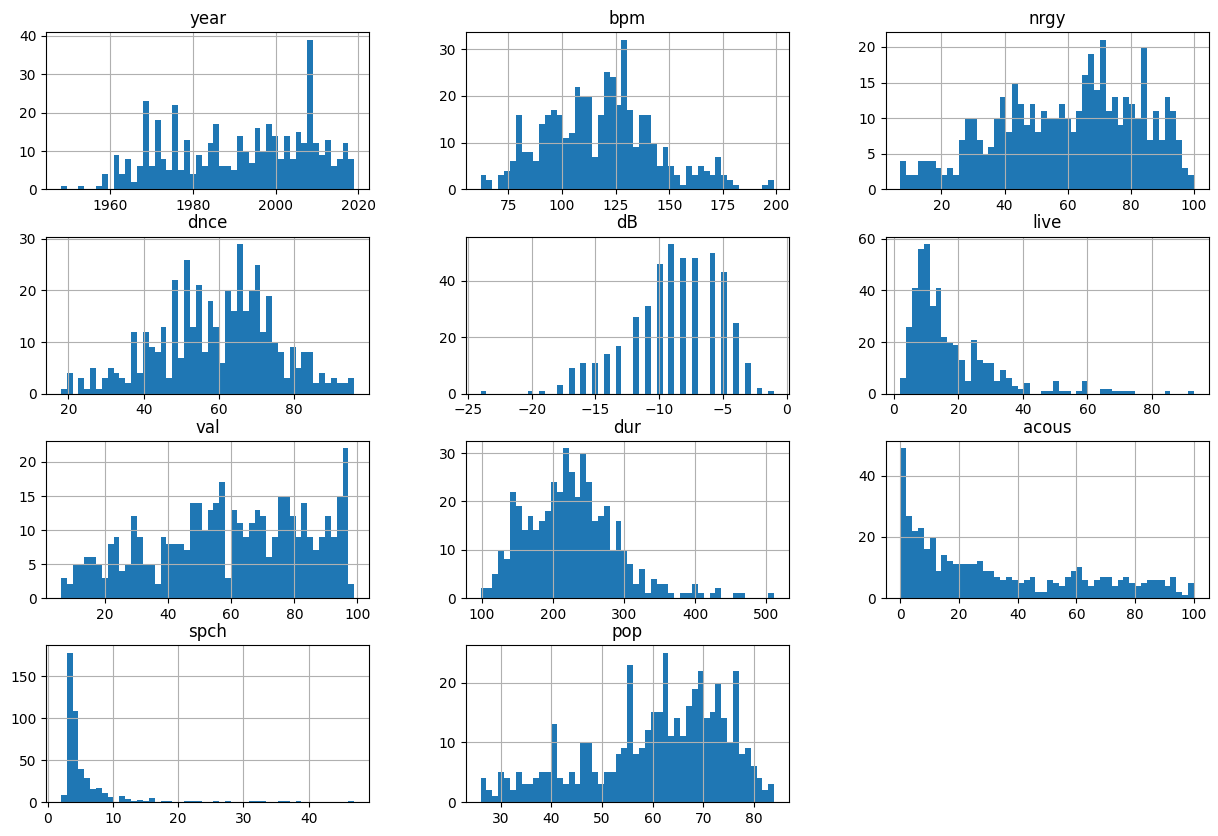

In [341]:
spotify_train[numerical_features].hist(bins=50, figsize=(15,10))

## Correlation between popularity score and other features

<Axes: >

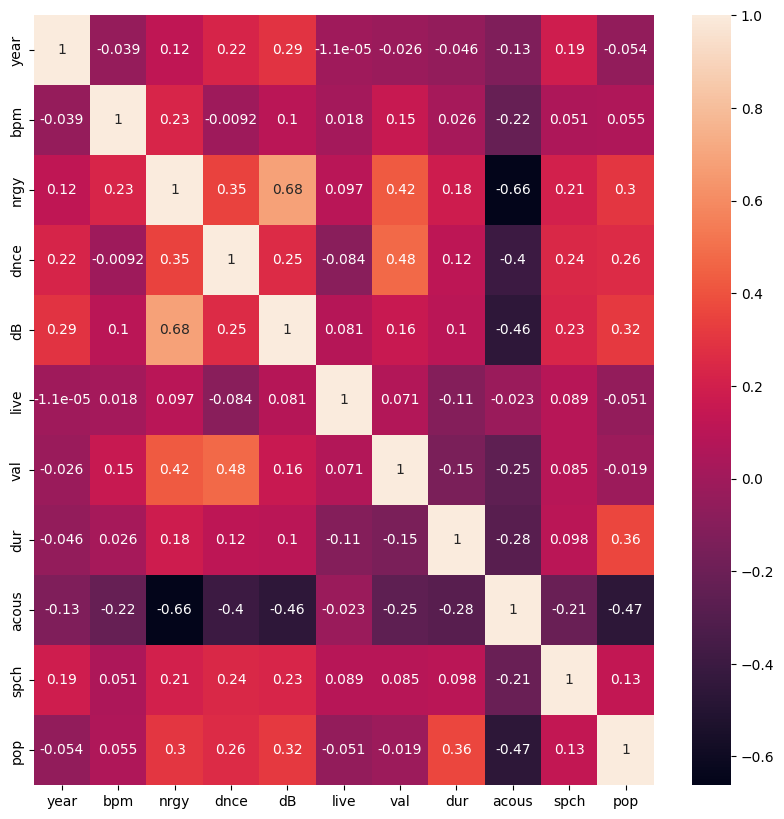

In [342]:
spotify_corr = spotify_train[numerical_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify_corr, annot=True)

In [343]:
# Correlation of features with Popularity scores
spotify_corr['pop'].sort_values(ascending=False)

,pop
pop,1.000000
dur,0.363266
dB,0.316854
nrgy,0.303797
dnce,0.258670
spch,0.130955
bpm,0.055024
val,-0.018713
live,-0.051364
year,-0.054293


<Axes: title={'center': 'Correlation between Popularity score and Year of release'}, xlabel='year', ylabel='pop'>

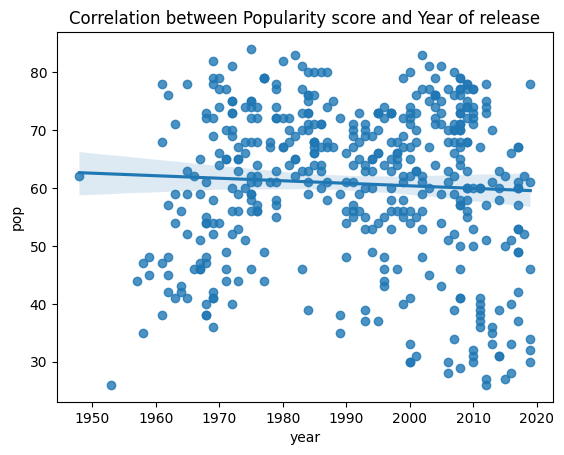

In [344]:
plt.title("Correlation between Popularity score and Year of release")
sns.regplot(x=spotify_train["year"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and BPM'}, xlabel='bpm', ylabel='pop'>

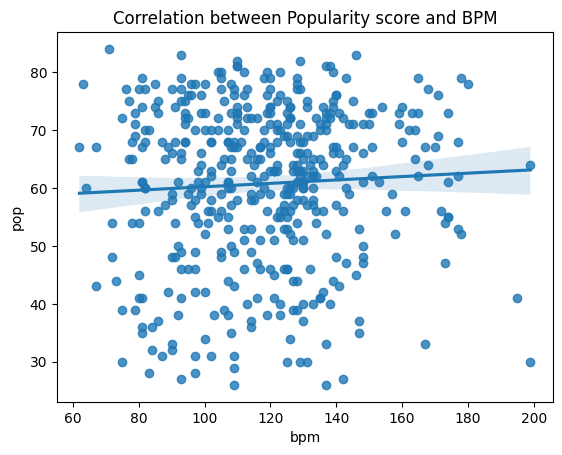

In [345]:
plt.title("Correlation between Popularity score and BPM")
sns.regplot(x=spotify_train["bpm"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Energy'}, xlabel='nrgy', ylabel='pop'>

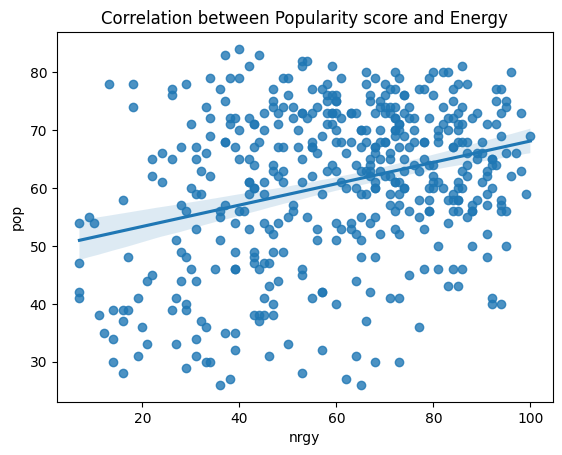

In [346]:
plt.title("Correlation between Popularity score and Energy")
sns.regplot(x=spotify_train["nrgy"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Danceability'}, xlabel='dnce', ylabel='pop'>

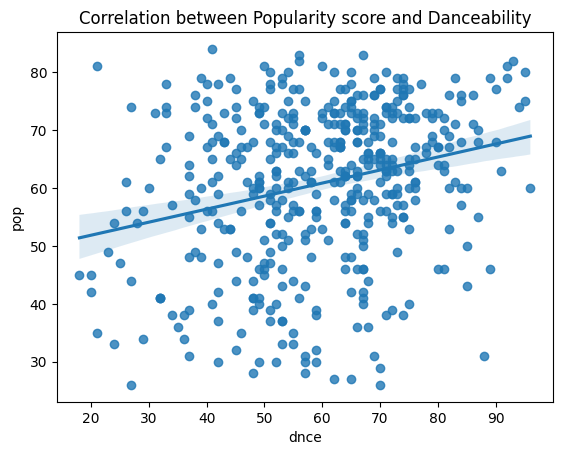

In [347]:
plt.title("Correlation between Popularity score and Danceability")
sns.regplot(x=spotify_train["dnce"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and dB'}, xlabel='dB', ylabel='pop'>

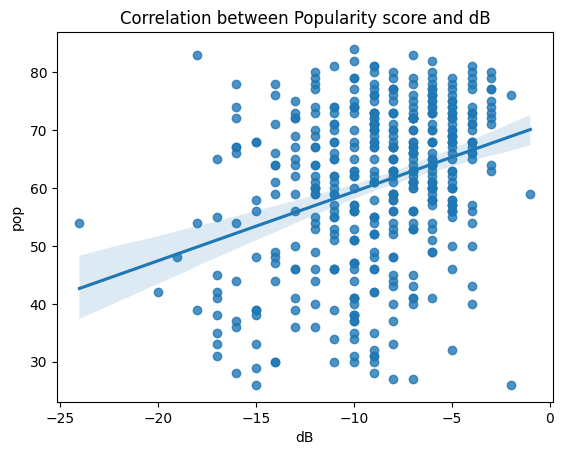

In [348]:
plt.title("Correlation between Popularity score and dB")
sns.regplot(x=spotify_train["dB"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Live'}, xlabel='live', ylabel='pop'>

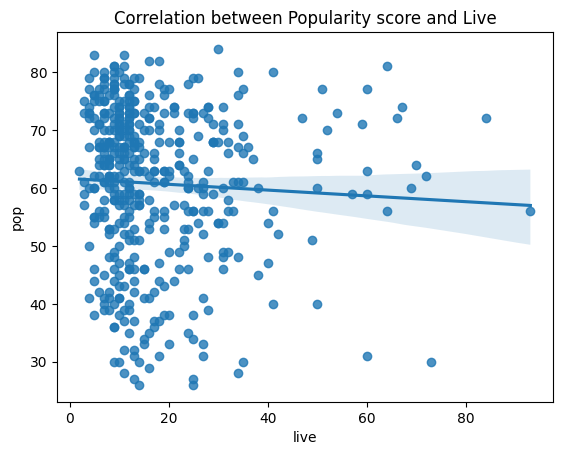

In [349]:
plt.title("Correlation between Popularity score and Live")
sns.regplot(x=spotify_train["live"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Valence'}, xlabel='val', ylabel='pop'>

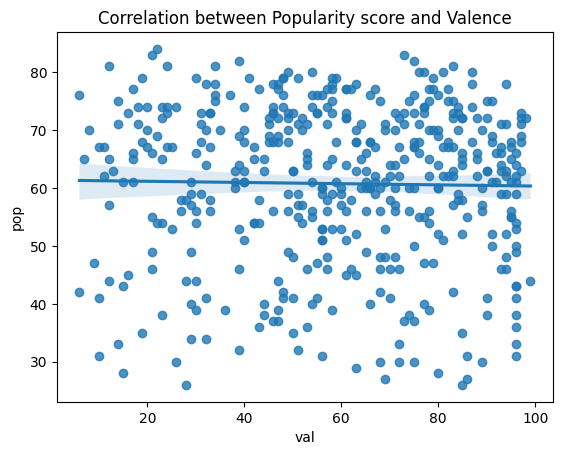

In [350]:
plt.title("Correlation between Popularity score and Valence")
sns.regplot(x=spotify_train["val"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Duration'}, xlabel='dur', ylabel='pop'>

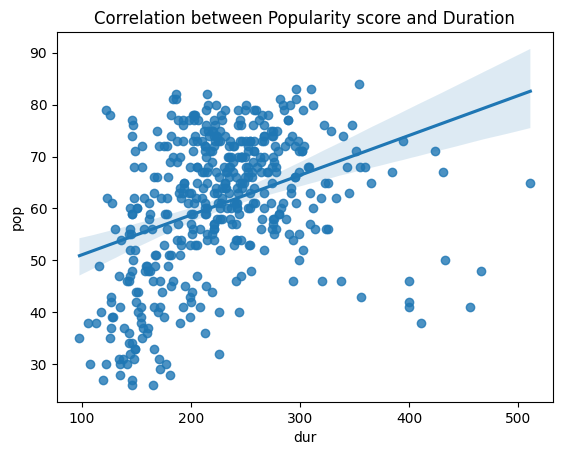

In [351]:
plt.title("Correlation between Popularity score and Duration")
sns.regplot(x=spotify_train["dur"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Speechiness'}, xlabel='spch', ylabel='pop'>

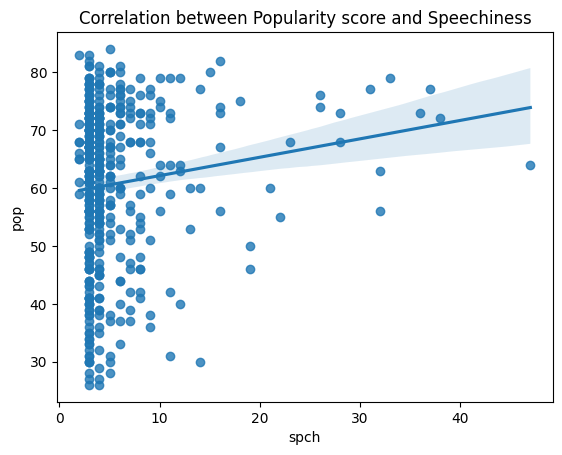

In [352]:
plt.title("Correlation between Popularity score and Speechiness")
sns.regplot(x=spotify_train["spch"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Acoustic'}, xlabel='acous', ylabel='pop'>

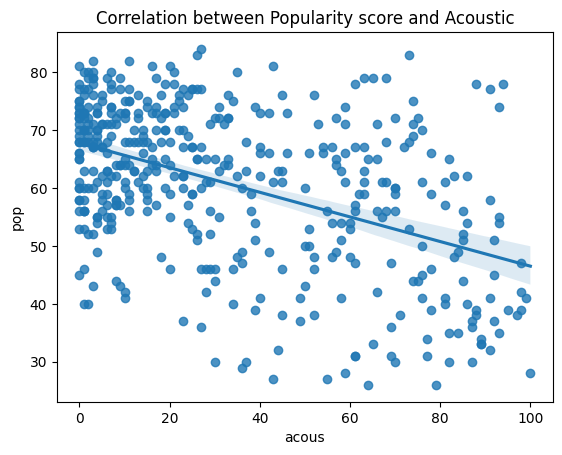

In [353]:
plt.title("Correlation between Popularity score and Acoustic")
sns.regplot(x=spotify_train["acous"],y=spotify_train["pop"])

We can see that dataset features  year, valence, liveness, bpm show  little to no correlation  with the popularity score.



# Analysing Categorical Features

In [354]:
spotify_train[categorical_features]

,artist,title,top genre,pop
0,Connie Francis,My Happiness,adult standards,44
1,The Teddy Bears,Unchained Melody,NaN,37
2,Bee Gees,How Deep Is Your Love,adult standards,77
3,Barbra Streisand,Woman in Love,adult standards,67
4,Elton John,Goodbye Yellow Brick Road - Remastered 2014,glam rock,63
...,...,...,...,...
448,Ella Fitzgerald,But Not For Me,adult standards,45
449,Jan & Dean,Surf City,brill building pop,50
450,Nelly,Dilemma,dance pop,77
451,*NSYNC,It's Gonna Be Me,boy band,62


# Analysing Artist Popularity

In [355]:
average_popularity_score_by_artist = spotify_train[["artist","pop"]].groupby("artist").mean().sort_values("pop",ascending=False)

In [356]:
#Artist who have previously released songs with high popularity score
average_popularity_score_by_artist.head(10)

,pop
artist,
TOTO,83.0
Coldplay,82.0
Linkin Park,81.0
Matthew Wilder,81.0
Tears For Fears,80.0
TLC,79.0
Estelle,79.0
Fleetwood Mac,79.0
Flo Rida,79.0


In [357]:
average_popularity_score_by_artist.describe()

,pop
count,345.000000
mean,59.409887
std,13.500250
min,26.000000
25%,52.000000
50%,61.500000
75%,70.000000
max,83.000000


In [358]:
#Artist who have previously released songs with low popularity score
average_popularity_score_by_artist.tail(10)

,pop
artist,
Tommy Steele,30.0
Joey Dee,30.0
The Beau Brummels,30.0
Jayne Mansfield,29.0
Ike Carpenter Orchestra,28.0
Green Martini Keys,28.0
Terry Dene,27.0
Suzi Miller And Johnson Brothers,27.0
Anthony Newley,26.0


# Data Preprocessing

## Representing artist by their historical popularity score

In [359]:
default_popularity = 60

# Create the 'artist_popularity' feature
spotify_train['artist_popularity'] = spotify_train['artist'].map(average_popularity_score_by_artist['pop']).fillna(default_popularity)
spotify_test["artist_popularity"] = spotify_test['artist'].map(average_popularity_score_by_artist['pop']).fillna(default_popularity)
spotify_train.drop(columns="artist", inplace= True)
spotify_test.drop(columns="artist", inplace= True)

In [360]:
spotify_train.head()

,Id,title,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,artist_popularity
0,1,My Happiness,adult standards,1996,107,31,45,-8,13,28,150,75,3,44,44.000000
1,2,Unchained Melody,NaN,2011,114,44,53,-8,13,47,139,49,3,37,38.500000
2,3,How Deep Is Your Love,adult standards,1979,105,36,63,-9,13,67,245,11,3,77,77.000000
3,4,Woman in Love,adult standards,1980,170,28,47,-16,13,33,232,25,3,67,59.333333
4,5,Goodbye Yellow Brick Road - Remastered 2014,glam rock,1973,121,47,56,-8,15,40,193,45,3,63,68.777778


In [361]:
spotify_test.head()

,Id,title,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_popularity
0,454,Pump It,dance pop,2005,154,93,65,-3,75,74,213,1,18,73.333333
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",glam rock,1994,161,39,30,-15,11,14,292,26,3,68.777778
2,456,We Are The Champions - Remastered 2011,glam rock,1977,64,46,27,-7,12,18,179,38,3,73.285714
3,457,Insomnia - Radio Edit,big beat,2010,127,92,71,-9,37,53,216,6,4,60.000000
4,458,This Eve of Parting,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,60.000000


## Dropping song Title

In [362]:
spotify_train.drop(columns="title",inplace=True)
spotify_test.drop(columns="title",inplace=True)

In [363]:
spotify_train.head()

,Id,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,artist_popularity
0,1,adult standards,1996,107,31,45,-8,13,28,150,75,3,44,44.000000
1,2,NaN,2011,114,44,53,-8,13,47,139,49,3,37,38.500000
2,3,adult standards,1979,105,36,63,-9,13,67,245,11,3,77,77.000000
3,4,adult standards,1980,170,28,47,-16,13,33,232,25,3,67,59.333333
4,5,glam rock,1973,121,47,56,-8,15,40,193,45,3,63,68.777778


In [364]:
spotify_test.head()

,Id,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_popularity
0,454,dance pop,2005,154,93,65,-3,75,74,213,1,18,73.333333
1,455,glam rock,1994,161,39,30,-15,11,14,292,26,3,68.777778
2,456,glam rock,1977,64,46,27,-7,12,18,179,38,3,73.285714
3,457,big beat,2010,127,92,71,-9,37,53,216,6,4,60.000000
4,458,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,60.000000


In [365]:
numerical_features = ["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch","pop"]
input_features  = ["dur","dB","nrgy","dnce","spch","acous","artist_popularity","val","year","live","bpm"]
corr_feature =  ["dur","dB","nrgy","dnce","spch","acous"]
uncorr_features = ["artist_popularity","val","year","live","bpm"]
target = ["pop"]

In [388]:
scaler = StandardScaler()

scaled_corr_train = pd.DataFrame(scaler.fit_transform(spotify_train[input_features]))

PCA_estimator = PCA(n_components=1)

X_train_corr = pd.DataFrame(PCA_estimator.fit_transform(scaled_corr_train))
X_train_corr.columns = X_train_corr.columns.astype(str)
print("\n++++++++++++++++\n",X_train_corr.head())

scaled_corr_test = pd.DataFrame(scaler.transform(spotify_test[input_features]))

X_test_corr = pd.DataFrame(PCA_estimator.transform(scaled_corr_test))
X_test_corr.columns = X_test_corr.columns.astype(str)
print("\n++++++++++++++++\n",X_test_corr.head())



++++++++++++++++
           0
0 -2.581181
1 -1.523261
2  0.102381
3 -1.867969
4 -0.804657

++++++++++++++++
           0
0  3.351517
1 -1.648879
2 -1.706950
3  1.408843
4 -0.884218


In [389]:
# X_train = pd.concat([spotify_train[uncorr_features],X_train_corr],axis=1)
# X_test = pd.concat([spotify_test[uncorr_features],X_test_corr],axis=1)

X_train = spotify_train[input_features]
X_test = spotify_test[input_features]

y_train = spotify_train[target]

In [390]:
X_train.head()

,artist_popularity,val,year,live,bpm,0
0,44.000000,28,1996,13,107,-2.581181
1,38.500000,47,2011,13,114,-1.523261
2,77.000000,67,1979,13,105,0.102381
3,59.333333,33,1980,13,170,-1.867969
4,68.777778,40,1973,15,121,-0.804657


In [386]:
X_test.head()

,artist_popularity,val,year,live,bpm,0
0,73.333333,74,2005,75,154,2.764551
1,68.777778,14,1994,11,161,-1.786741
2,73.285714,18,1977,12,64,-1.227667
3,60.000000,53,2010,37,127,1.357501
4,60.000000,34,2018,21,115,-0.952458


In [379]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [380]:
# model = RandomForestRegressor()
# model.fit(X_train,y_train)

In [381]:
y_predict = model.predict(X_test)

In [382]:
y_predict

array([[72.12876256],
       [68.40357126],
       [73.46090688],
       [59.66219643],
       [59.76189067],
       [68.06978808],
       [60.02600533],
       [59.7805035 ],
       [60.03794132],
       [60.31094965],
       [40.98901332],
       [73.92726116],
       [44.075369  ],
       [58.45980889],
       [60.32129268],
       [59.78798846],
       [76.7184779 ],
       [59.65939067],
       [70.28887006],
       [78.82377363],
       [60.27820174],
       [60.56689552],
       [63.90729922],
       [50.11159969],
       [59.95106556],
       [60.31380062],
       [60.09939981],
       [60.06212002],
       [36.14230044],
       [60.56496927],
       [60.22490107],
       [60.31393681],
       [73.41285056],
       [60.10393489],
       [60.78806508],
       [60.26642072],
       [77.11681612],
       [59.00565311],
       [60.24277241],
       [60.45229228],
       [65.7103376 ],
       [59.68950122],
       [57.90755847],
       [60.20386098],
       [59.74402406],
       [59

In [383]:
len(spotify_test["Id"])

114

In [384]:
df = pd.DataFrame({'Id': spotify_test['Id']})

# Add the y_predict values as a new column
df['pop'] = y_predict

# Now df contains the desired 'ID' and 'y_predict' columns
print(df.head())

pd.DataFrame(df).to_csv("submission.csv",index=False)


    Id        pop
0  454  72.128763
1  455  68.403571
2  456  73.460907
3  457  59.662196
4  458  59.761891
